# Ford Go Bike Data Exploration
## by Eng. Al-Moataz bellah Mohamed Essam eldin

## Preliminary Wrangling

>This data set is taken from https://www.fordgobike.com/system-data and represents trips taken by members of the bike sharing service by FORD for month of February of 2019.

>Data consists of info about trips taken by service's members, their types, their birth year, their gender, stations of starting and ending trips, duration of trips etc.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in dataset and describing its properties through the questions below.

In [2]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:20:44.0740   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
1              23.0                     The Embarcadero at Steuart St   
2              86.0                           Market St at Dolores St   
3             375.0                           Grove St at Masonic Ave   
4               7.0                               Frank H Ogawa Plaza   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811            13.0   
1               37.791464              -122.391034            81.0   
2               37.769305              -122.426826             3.0   
3               37.774836              -122.446546            70.0   
4               37.804562              -122.271738           222.0   

                               end_station_name  end_station_latitude  \
0                Commercial St at Montgomery St             37.794231   
1                            Berry St at 4th St             37.775880   
2  Powell St BART Station (Market St at 4th St)             37.786375   
3                        Central Ave at Fell St             37.773311   
4                         10th Ave at E 15th St             37.792714   

   end_station_longitude  bike_id   user_type  member_birth_year  \
0            -122.402923     4902    Customer             1984.0   
1            -122.393170     2535    Customer                NaN   
2            -122.404904     5905    Customer             1972.0   
3            -122.444293     6638  Subscriber             1989.0   
4            -122.248780     4898  Subscriber             1974.0   

  member_gender bike_share_for_all_trip  
0          Male                      No  
1           NaN                      No  
2          Male                      No  
3         Other                      No  
4          Male                     Yes

In [3]:
df.shape

(183412, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
#checking for any duplicates
df.duplicated().sum()

0

In [6]:
#view the null values
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

>since the max null values counts is 8265 which is approximate 4.5% of entire data we can drop it

In [7]:
#drop null values
df.dropna(inplace = True)

>converting data types to more convienient ones

>creating new columns derived from given data

In [8]:
#convert start_time and end_time to datetime type format
df[['start_time','end_time']] = df[['start_time','end_time']].apply(pd.to_datetime, format='%Y-%m-%d %H:%M:%S.%f')

#convert member_birth_year , start_station_id & end_station_id to integer data type
df[['member_birth_year','start_station_id','end_station_id']] = df[['member_birth_year','start_station_id','end_station_id']].astype(int)

#add columns for the member age according to year of birth, the day of week the trip started
df['member_age'] = 2019 - df['member_birth_year']
df['start_weekday'] = df.start_time.dt.strftime('%A')

In [9]:
#order the category of weekdays
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdaycat = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
df['start_weekday'] = df['start_weekday'].astype(weekdaycat)

In [10]:
#show dataset details
print("Number of data entries is",df.shape[0])
print(df.info())
print(df.describe())

Number of data entries is 174952
<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  int32         
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  int32         
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int

In [11]:
#the time frame that dataset taken in
print("Starting time for the data is", df.start_time.min())
print("Ending time for the data is", df.end_time.max())
print("Time interval for the data is", df.end_time.max()-df.start_time.min())

Starting time for the data is 2019-02-01 00:00:20.636000
Ending time for the data is 2019-03-01 08:01:55.975000
Time interval for the data is 28 days 08:01:35.339000


In [12]:
df.head()

duration_sec              start_time                end_time  \
0         52185 2019-02-28 17:32:10.145 2019-03-01 08:01:55.975   
2         61854 2019-02-28 12:13:13.218 2019-03-01 05:24:08.146   
3         36490 2019-02-28 17:54:26.010 2019-03-01 04:02:36.842   
4          1585 2019-02-28 23:54:18.549 2019-03-01 00:20:44.074   
5          1793 2019-02-28 23:49:58.632 2019-03-01 00:19:51.760   

   start_station_id                                start_station_name  \
0                21  Montgomery St BART Station (Market St at 2nd St)   
2                86                           Market St at Dolores St   
3               375                           Grove St at Masonic Ave   
4                 7                               Frank H Ogawa Plaza   
5                93                      4th St at Mission Bay Blvd S   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811              13   
2               37.769305              -122.426826               3   
3               37.774836              -122.446546              70   
4               37.804562              -122.271738             222   
5               37.770407              -122.391198             323   

                               end_station_name  end_station_latitude  \
0                Commercial St at Montgomery St             37.794231   
2  Powell St BART Station (Market St at 4th St)             37.786375   
3                        Central Ave at Fell St             37.773311   
4                         10th Ave at E 15th St             37.792714   
5                            Broadway at Kearny             37.798014   

   end_station_longitude  bike_id   user_type  member_birth_year  \
0            -122.402923     4902    Customer               1984   
2            -122.404904     5905    Customer               1972   
3            -122.444293     6638  Subscriber               1989   
4            -122.248780     4898  Subscriber               1974   
5            -122.405950     5200  Subscriber               1959   

  member_gender bike_share_for_all_trip  member_age start_weekday  
0          Male                      No          35      Thursday  
2          Male                      No          47      Thursday  
3         Other                      No          30      Thursday  
4          Male                     Yes          45      Thursday  
5          Male                      No          60      Thursday

### What is the structure of your dataset?

*The cleaned data contains approximately 174,952 individual trip records with 18 variables collected. The variables can be divided into 3 major categories:*

*trip duration: duration_sec, start_time, end_time, start_dayofweek*

*station info: start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude*

*member info: bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip, member_age*

### What is/are the main feature(s) of interest in your dataset?

*I am interested in exploring trips' duration against the members characterstics (age, user type, gender)*

*Intersted in duration of trips against days*

*Also I would invistigate the age of member against member's gender & the user type*

*I want to invistigate the bike share data against user characterstics and time of trips*

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

*Trip's start time and duration information will help understanding how long a trip usually takes and when.*

*The member information like user type, gender and age will help to find out who are the main target customer groups.*

*Bike share for the trip will help find the users who like to share*

## Univariate Exploration

**Here we will invistigate age of members & trips duration, if any unusual points or outliers found we will clean the dataset**

In [13]:
sb.set_style("whitegrid")
sb.set_palette("Dark2_r")
base_color = sb.color_palette("Dark2_r")[2]
base_color1 = sb.color_palette("Dark2_r")[1]
base_color2 = sb.color_palette("Dark2_r")[3]

In [14]:
sb.color_palette("Dark2_r")

[(0.6509803921568628, 0.4627450980392157, 0.11372549019607843),
 (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
 (0.4, 0.6509803921568628, 0.11764705882352941),
 (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
 (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
 (0.8509803921568627, 0.37254901960784315, 0.00784313725490196)]

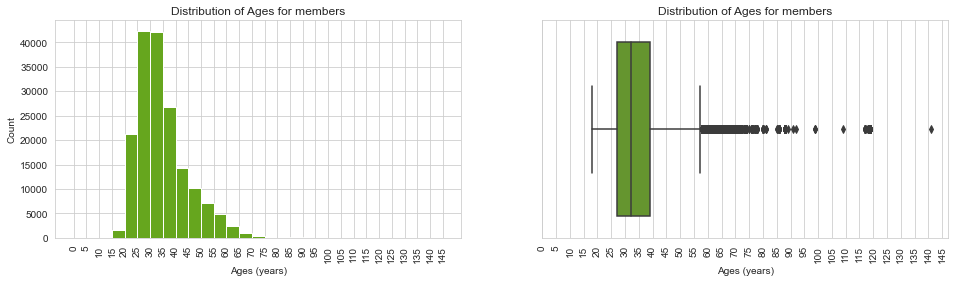

In [15]:
############## Distribution of ages for members
binsize = 5
bins = np.arange(0,df.member_age.max()+binsize,binsize)
plt.figure(figsize=[16,4])
plt.subplot(1,2,1)
plt.hist(data = df, x = 'member_age',bins=bins, color = base_color)
plt.title('Distribution of Ages for members')
plt.xticks(bins,bins,rotation = 90)
plt.xlabel('Ages (years)')
plt.ylabel('Count')
plt.subplot(1,2,2)
sb.boxplot(x = df.member_age, color = base_color)
plt.title('Distribution of Ages for members')
plt.xticks(bins,bins,rotation = 90)
plt.xlabel('Ages (years)')
plt.show()

In [16]:
df.member_age.describe(percentiles=[0.99])

count    174952.000000
mean         34.196865
std          10.118731
min          18.000000
50%          32.000000
99%          64.000000
max         141.000000
Name: member_age, dtype: float64

>I found that 99% of users younger than 64 years. There is outliers when age is above 65 years. 

>We could drop all entries which member age > 65 years

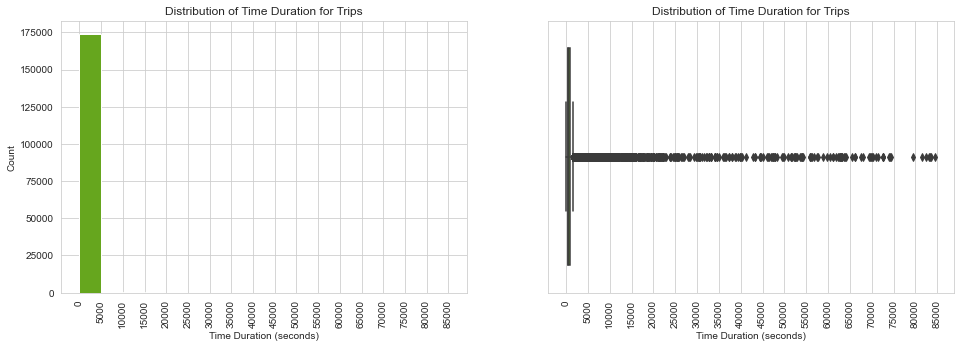

In [17]:
##############distribution of Time Duration for Trips
binsize = 5000
bins = np.arange(0,df.duration_sec.max()+binsize,binsize)
plt.figure(figsize=[16,5])
plt.subplot(1,2,1)
plt.hist(data= df, x='duration_sec',bins =bins, color = base_color)
plt.title('Distribution of Time Duration for Trips')
plt.xticks(bins,bins,rotation = 90)
plt.xlabel('Time Duration (seconds)')
plt.ylabel('Count')
plt.subplot(1,2,2)
sb.boxplot(x= df.duration_sec, color = base_color)
plt.title('Distribution of Time Duration for Trips')
plt.xticks(bins,bins,rotation = 90)
plt.xlabel('Time Duration (seconds)')
plt.show()

In [18]:
df.duration_sec.describe(percentiles=[0.99])

count    174952.000000
mean        704.002744
std        1642.204905
min          61.000000
50%         510.000000
99%        3176.000000
max       84548.000000
Name: duration_sec, dtype: float64

>I found that 99% of trips' duration is less than 3176 seconds. Above plots shows that there is outliers when duration is above 3200 seconds. We could drop all entries which duration > 3200 seconds

In [19]:
#additional cleaning to get off the outliers in member_age & duration_sec
df.drop(df[df.member_age > 65].index, inplace = True)
df.drop(df[df.duration_sec > 3200].index, inplace = True)

In [20]:
df.shape

(171865, 18)

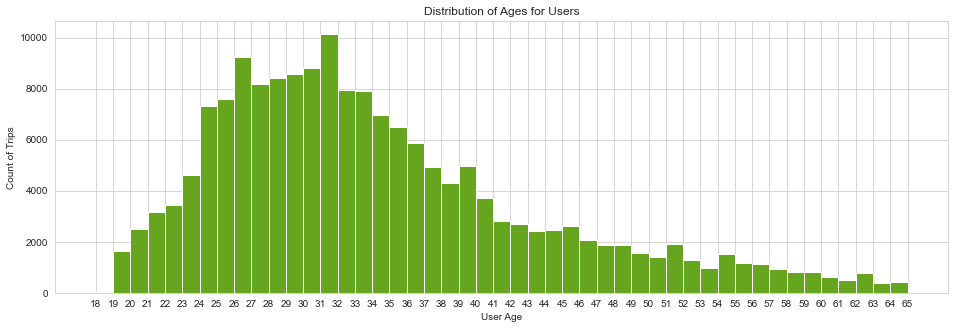

In [21]:
##############distribution of ages for members
binsize = 1
bins = np.arange(df.member_age.min(), df.member_age.max()+binsize, binsize)
plt.figure(figsize=[16,5])
plt.hist(data=df, x='member_age', bins=bins, color=base_color)
plt.xticks(bins, bins)
plt.title('Distribution of Ages for Users')
plt.xlabel('User Age')
plt.ylabel('Count of Trips')
plt.show()

>I found that the age of most of users who uses this service is between 24 years & 40 years

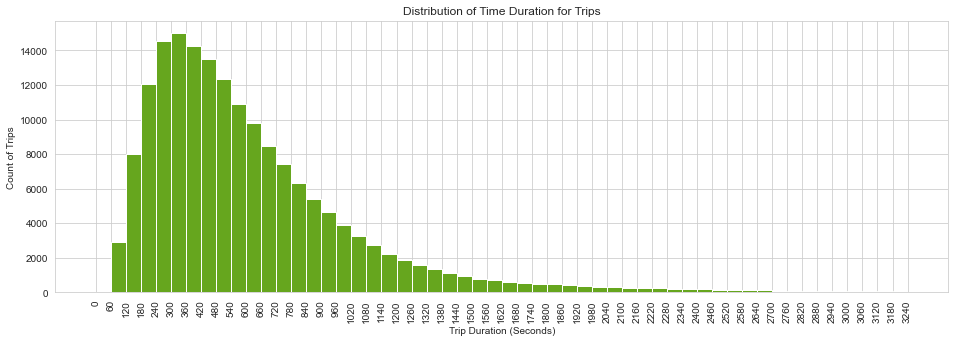

In [22]:
##############distribution of Time Duration for Trips
binsize = 60
bins = np.arange(0, df.duration_sec.max()+binsize, binsize)
plt.figure(figsize=[16,5])
plt.hist(data=df, x='duration_sec', bins=bins, color = base_color)
plt.xticks(bins, bins,rotation=90)
plt.title('Distribution of Time Duration for Trips')
plt.xlabel('Trip Duration (Seconds)')
plt.ylabel('Count of Trips')
plt.show()

>The Trip's durations of most of the trips is between 120 seconds & 840 seconds

**Here we will invistigate days & weekdays & starting trips hours and check for any relations**

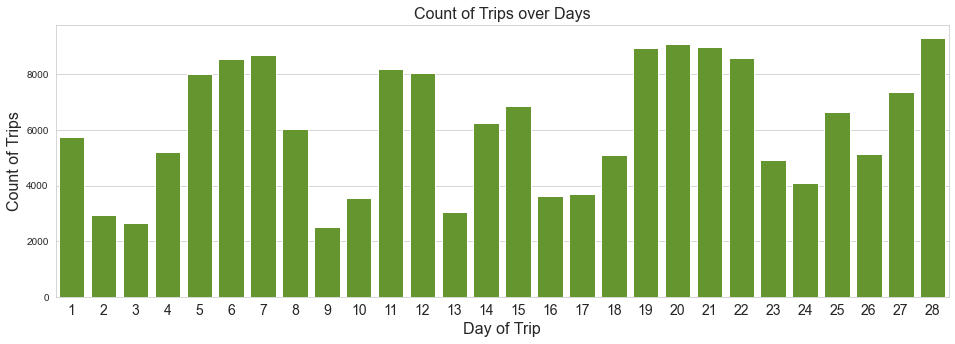

In [23]:
# trip distribution over days
plt.figure(figsize=[16,5])
sb.countplot(x=df.start_time.dt.day, color=base_color)
plt.title('Count of Trips over Days',fontsize=16)
plt.xlabel('Day of Trip',fontsize=16)
plt.xticks(fontsize=14)
plt.ylabel('Count of Trips',fontsize=16)
plt.show()

>Notice that there is days that have high number of trips count than other days

>So we will invistigate more on the days of week

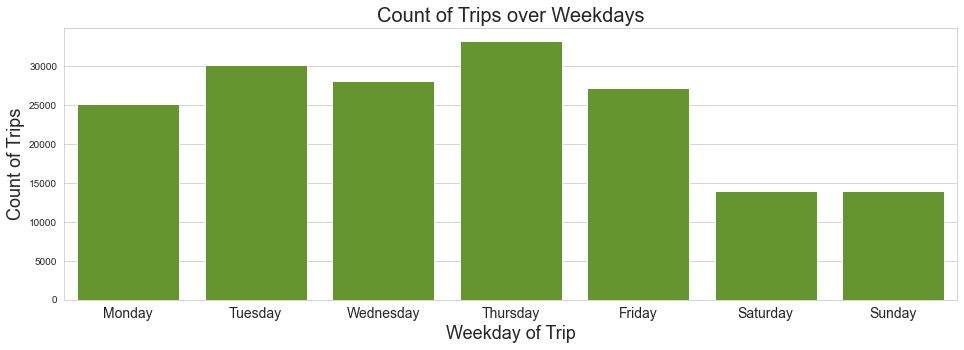

In [24]:
# trip distribution over weekdays
plt.figure(figsize=[16,5])
sb.countplot(x=df.start_weekday, color=base_color)
plt.title('Count of Trips over Weekdays',fontsize=20)
plt.xlabel('Weekday of Trip',fontsize=18)
plt.xticks(fontsize=14)
plt.ylabel('Count of Trips',fontsize=18)
plt.show()

>The trips is mostly used during working days(monday to friday) and its rate gets low during weekends(saturday & sunday)

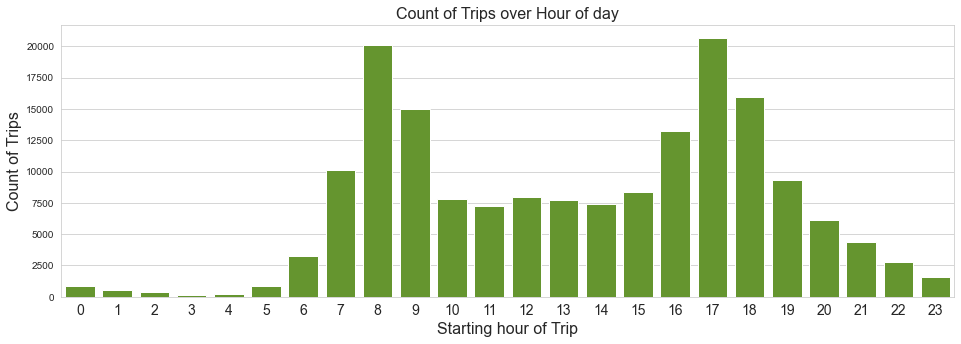

In [25]:
# trip distribution over weekdays
plt.figure(figsize=[16,5])
sb.countplot(x=df.start_time.dt.hour, color=base_color)
plt.title('Count of Trips over Hour of day',fontsize=16)
plt.xlabel('Starting hour of Trip',fontsize=16)
plt.xticks(fontsize=14)
plt.ylabel('Count of Trips',fontsize=16)
plt.show()

>Above plot shows the peak hours of using this service is between 7 & 9 AM and 4 & 6 PM

**The Next plots are for checking users who makes up of the rides, and checking for any relation.**

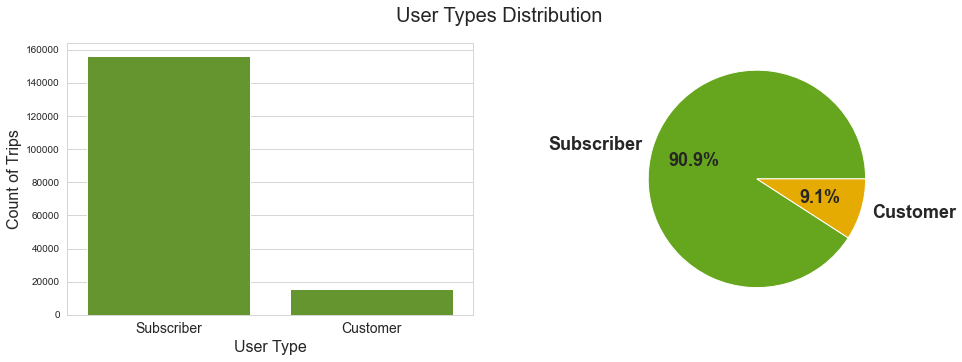

In [26]:
# User type 
plt.figure(figsize=[16,5])
plt.suptitle('User Types Distribution', fontsize=20)
plt.subplot(1,2,1)
sb.countplot(x=df.user_type, color=base_color)
plt.xlabel('User Type',fontsize=16)
plt.xticks(fontsize=14)
plt.ylabel('Count of Trips',fontsize=16)
plt.subplot(1,2,2)
values = df.user_type.value_counts()
labels = values.index
colors = [base_color,base_color1]
plt.pie(x=values, labels=labels , autopct="%.1f%%" ,textprops= {"fontsize":18,"weight":'bold'},colors=colors)
plt.show()

>It is obvious that 90% of users are subscribers for the service

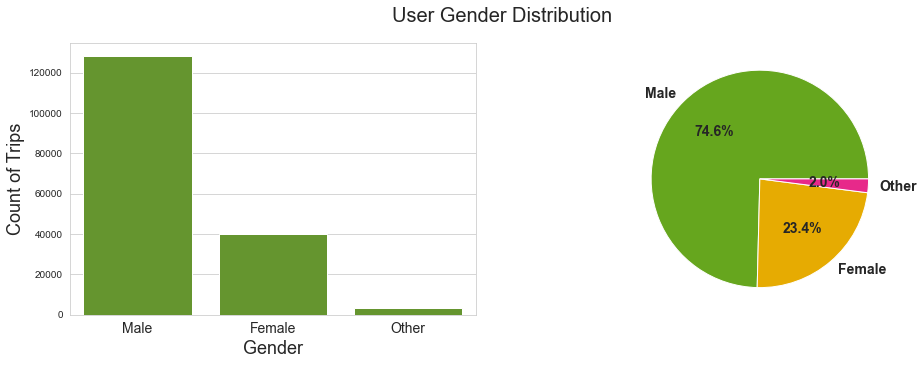

In [27]:
#Gender of the user
plt.figure(figsize=[16,5])
plt.suptitle('User Gender Distribution', fontsize=20)
plt.subplot(1,2,1)
sb.countplot(x=df.member_gender, color=base_color)
plt.xlabel('Gender',fontsize=18)
plt.xticks(fontsize=14)
plt.ylabel('Count of Trips',fontsize=18)
plt.subplot(1,2,2)
values = df.member_gender.value_counts()
labels = values.index
colors = [base_color,base_color1,base_color2]
plt.pie(x=values, labels=labels , autopct="%.1f%%" ,textprops= {"fontsize":14,"weight":'bold'},colors=colors)
plt.show()

>It shows that the 74% are males while females are 23.4%

**The Next plot are for checking sharing of the bikes during trips**

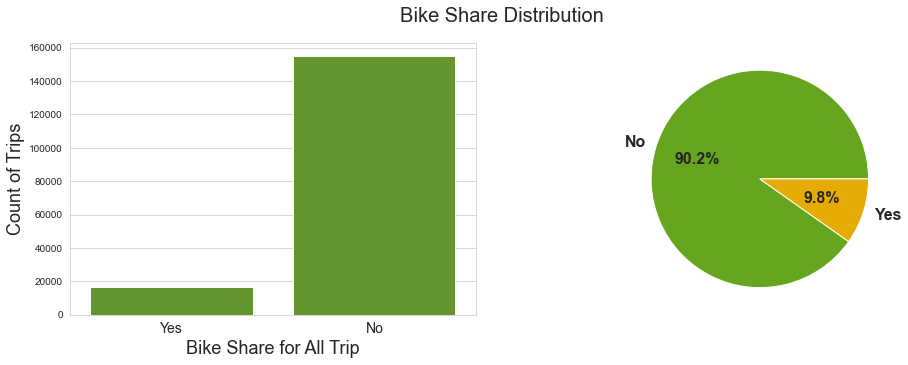

In [28]:
#share of the bike for all Trip
plt.figure(figsize=[16,5])
plt.suptitle('Bike Share Distribution', fontsize=20)
plt.subplot(1,2,1)
sb.countplot(x=df.bike_share_for_all_trip, color=base_color)
plt.xlabel('Bike Share for All Trip',fontsize=18)
plt.xticks(fontsize=14)
plt.ylabel('Count of Trips',fontsize=18)
plt.subplot(1,2,2)
values = df.bike_share_for_all_trip.value_counts()
labels = values.index
colors = [base_color,base_color1]
plt.pie(x=values, labels=labels , autopct="%.1f%%" ,textprops= {"fontsize":16,"weight":'bold'},colors=colors)
plt.show()

>We here find that 90.2% of trips don't share the bike

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The duration of most of the trips is between 120 seconds & 840 seconds.

There is days that have high number of trips count, so invistigating weekdays we found the service is commonly used during working days(monday to friday).

It shows the peak hours of using this service is between 7 & 9 AM and 4 & 6 PM.

I found that the age of most users who uses this service is between 24 years & 40 years.

It is obvious that 90% of users are subscribers for the service.

It shows that the 74% are males while females are 23.4%.

We found that 90.2% of trips don't share the bike.

No transformation is needed, since all relations are obvious.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The distribution of the trip duration and age of members was a little confusing at first.

By plotting out the original data, Used .describe(percentiles=[0.99]) and xticks() to zoom in to a smaller range where most trip records fell, which made the distribution much clearer.

I filtered out the outlier long trip records for the study.

## Bivariate Exploration


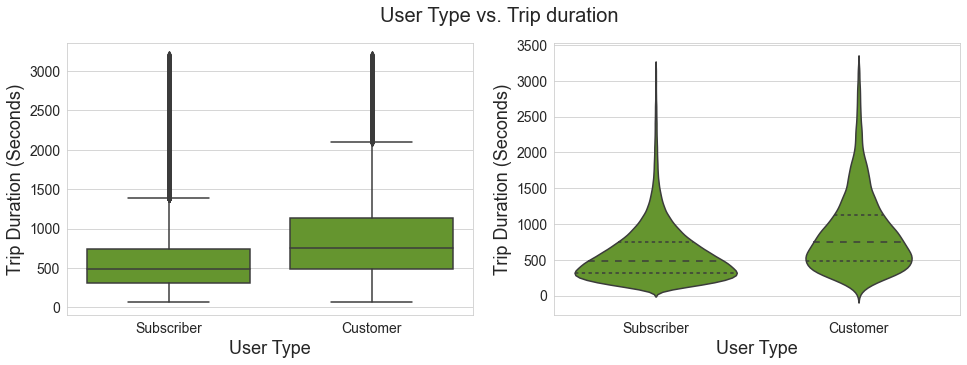

In [29]:
#relation between user type and duration
plt.figure(figsize=[16,5])
plt.suptitle('User Type vs. Trip duration', fontsize=20)
plt.subplot(1,2,1)
sb.boxplot(x=df.user_type, y=df.duration_sec, color=base_color)
plt.xlabel('User Type',fontsize=18)
plt.xticks(fontsize=14)
plt.ylabel('Trip Duration (Seconds)',fontsize=18)
plt.yticks(fontsize=14)
plt.subplot(1,2,2)
sb.violinplot(data=df, x=df.user_type, y=df.duration_sec, color=base_color, inner='quartile')
plt.xlabel('User Type',fontsize=18)
plt.xticks(fontsize=14)
plt.ylabel('Trip Duration (Seconds)',fontsize=18)
plt.yticks(fontsize=14)
plt.show()

>It appears that the subscribers have shorter trip duration than customers

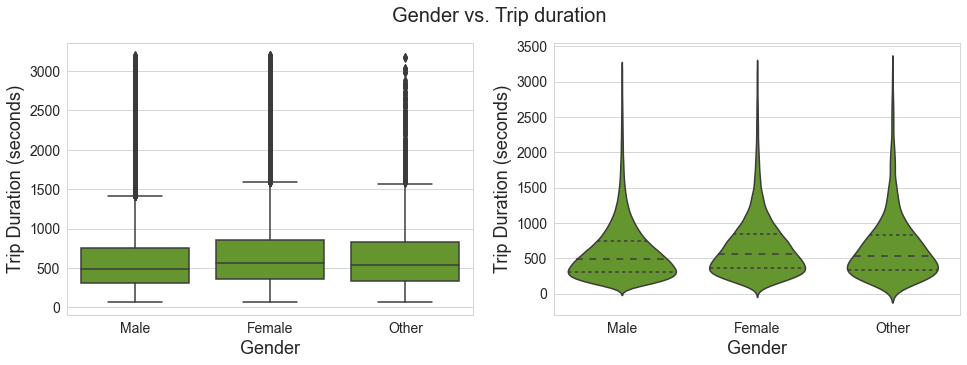

In [30]:
#relation between gender and duration
plt.figure(figsize=[16,5])
plt.suptitle('Gender vs. Trip duration', fontsize=20)
plt.subplot(1,2,1)
sb.boxplot(data=df, x=df.member_gender, y=df.duration_sec, color=base_color)
plt.xlabel('Gender',fontsize=18)
plt.xticks(fontsize=14)
plt.ylabel('Trip Duration (seconds)',fontsize=18)
plt.yticks(fontsize=14)
plt.subplot(1,2,2)
sb.violinplot(data=df, x=df.member_gender, y=df.duration_sec, color=base_color, inner='quartile')
plt.xlabel('Gender',fontsize=18)
plt.xticks(fontsize=14)
plt.ylabel('Trip Duration (seconds)',fontsize=18)
plt.yticks(fontsize=14)
plt.show()

>we found that males tend to have slightly shorter trips compared to females

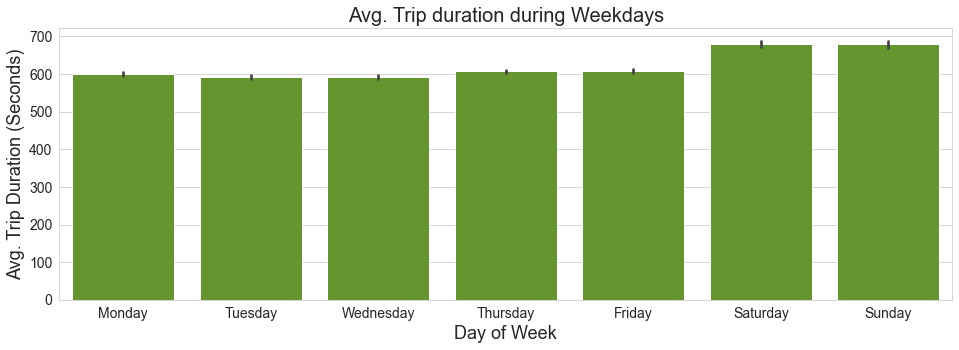

In [31]:
#relation between weekdays and duration
plt.figure(figsize=[16,5])
sb.barplot(x=df.start_weekday, y=df.duration_sec, color=base_color)
plt.xlabel('Day of Week',fontsize=18)
plt.xticks(fontsize=14)
plt.ylabel('Avg. Trip Duration (Seconds)',fontsize=18)
plt.yticks(fontsize=14)
plt.title('Avg. Trip duration during Weekdays', fontsize=20)
plt.show()

>it shows that during working days the trips is shorter than weekends days

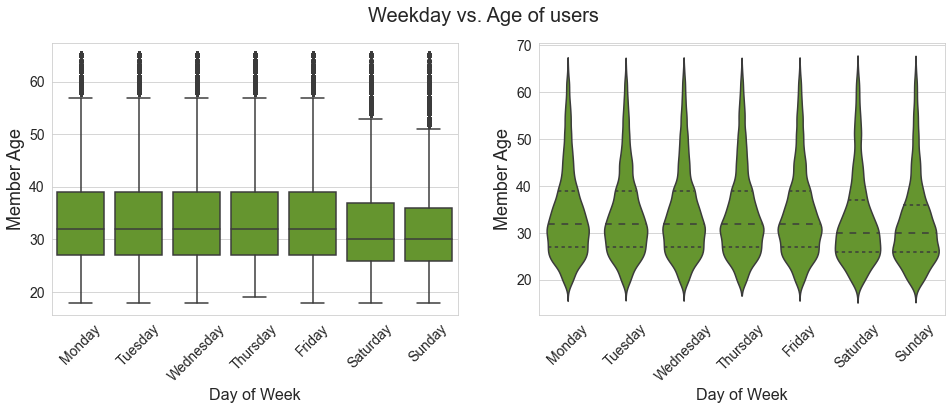

In [32]:
#relation between member age and weekdays
plt.figure(figsize=[16,5])
plt.suptitle('Weekday vs. Age of users', fontsize=20)
plt.subplot(1,2,1)
sb.boxplot(x=df.start_weekday, y=df.member_age, color=base_color)
plt.xlabel('Day of Week',fontsize=16)
plt.xticks(rotation=45,fontsize=14)
plt.ylabel('Member Age',fontsize=18)
plt.yticks(fontsize=14)
plt.subplot(1,2,2)
sb.violinplot(x=df.start_weekday, y=df.member_age, color=base_color, inner='quartile')
plt.xlabel('Day of Week',fontsize=16)
plt.xticks(rotation=45,fontsize=14)
plt.ylabel('Member Age',fontsize=18)
plt.yticks(fontsize=14)
plt.show()

>younger users is having trips during weekends while older users uses it in working days

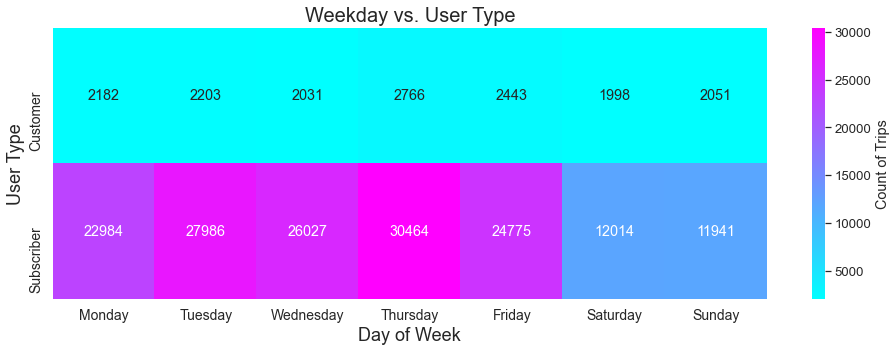

In [33]:
#Weekdays usage between customers and subscribers
sb.set(font_scale=1.2)
plt.figure(figsize=[16,5])
u_weekday = df.groupby(['user_type', 'start_weekday']).size()
u_weekday = u_weekday.reset_index(name='count')
u_weekday = u_weekday.pivot(index = 'user_type', columns = 'start_weekday', values = 'count')
plt.title('Weekday vs. User Type', fontsize=20)
sb.heatmap(u_weekday, annot = True, fmt = 'd',cmap = 'cool', cbar_kws={'label': 'Count of Trips'})
plt.xlabel("Day of Week",fontsize=18)
plt.xticks(fontsize=14)
plt.ylabel('User Type',fontsize=18)
plt.yticks(fontsize=14)
plt.show()

>There is overall more trips for subscribers than customers, while it shows the subscribers mainly uses this service for work

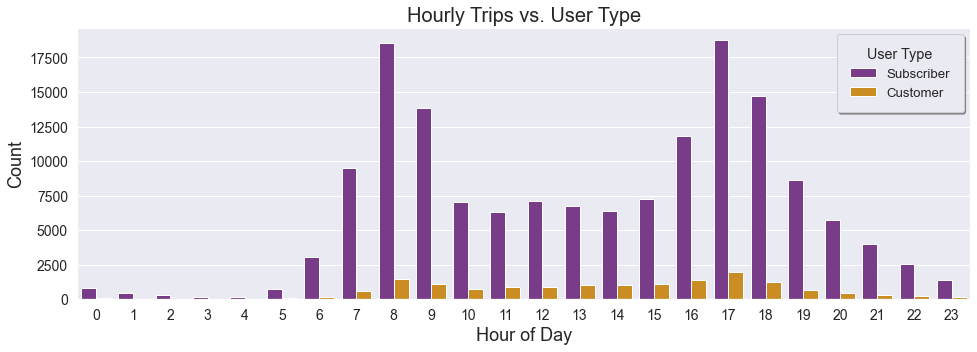

In [34]:
#hour of day usage between customers and subscribers
plt.figure(figsize=[16,5])
sb.countplot(x=df.start_time.dt.hour, hue = df.user_type, palette = "CMRmap")
plt.xlabel('Hour of Day',fontsize=18)
plt.xticks(fontsize=14)
plt.ylabel('Count',fontsize=18)
plt.yticks(fontsize=14)
plt.title('Hourly Trips vs. User Type', fontsize=20)
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1,title='User Type')
plt.show()

>both subscribers and customers tend to use the bikes during rush hours of going to work(7 to 9 AM) or leaving from work(4 to 6 PM)

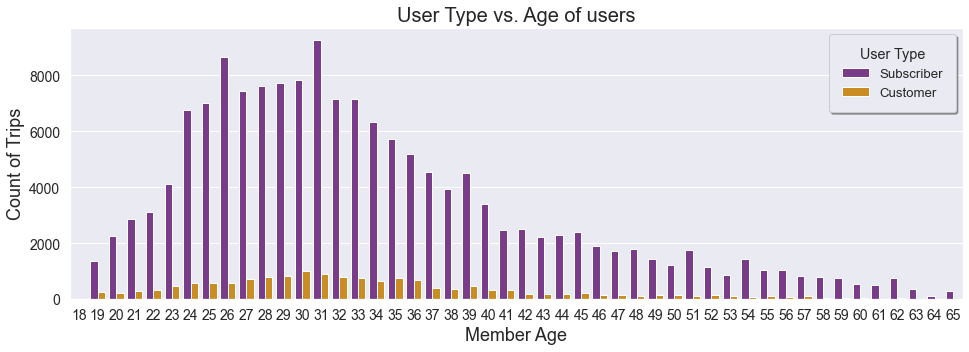

In [35]:
#relation between user type and age
plt.figure(figsize=[16,5])
sb.countplot(x=df.member_age, hue=df.user_type, palette = "CMRmap")
plt.xlabel('Member Age',fontsize=18)
plt.xticks(fontsize=14)
plt.ylabel('Count of Trips',fontsize=18)
plt.yticks(fontsize=14)
plt.title('User Type vs. Age of users', fontsize=20)
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1,title='User Type')
plt.show()

>Most of customers age is between 27 & 35 years, while most of subscribers age is between 24 & 33

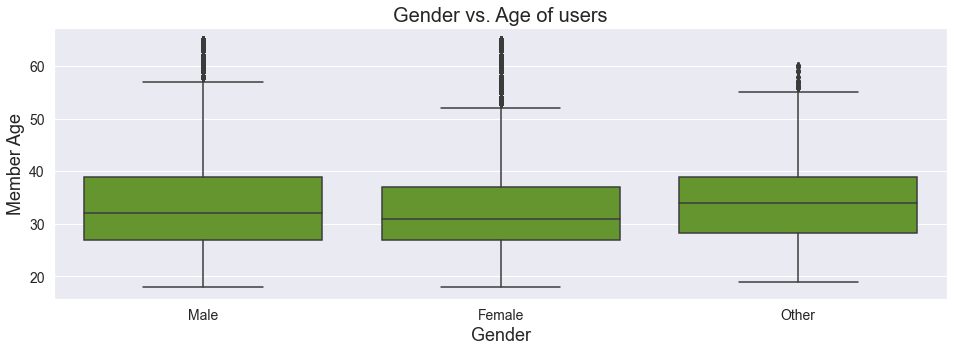

In [36]:
#relation between user gender and age
plt.figure(figsize=[16,5])
sb.boxplot(x=df.member_gender, y=df.member_age, color=base_color)
plt.xlabel('Gender',fontsize=18)
plt.xticks(fontsize=14)
plt.ylabel('Member Age',fontsize=18)
plt.yticks(fontsize=14)
plt.title('Gender vs. Age of users', fontsize=20)
plt.show()

>The females users are slightly younger than males users

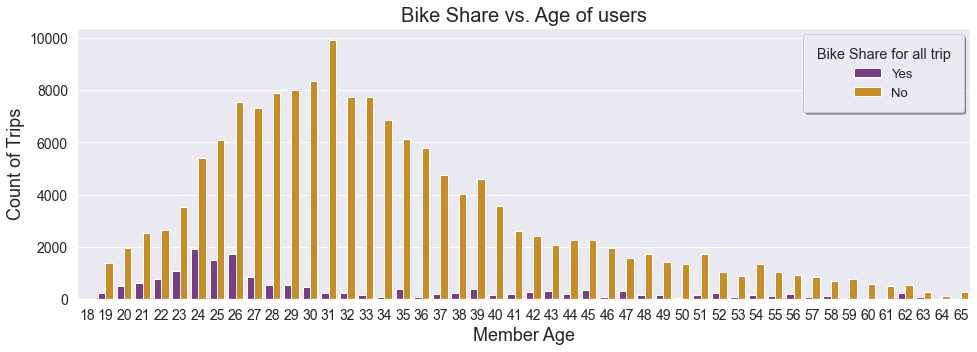

In [37]:
#relation between bike share and age
plt.figure(figsize=[16,5])
sb.countplot(x=df.member_age, hue=df.bike_share_for_all_trip, palette = "CMRmap")
plt.xlabel('Member Age',fontsize=18)
plt.xticks(fontsize=14)
plt.ylabel('Count of Trips',fontsize=18)
plt.yticks(fontsize=14)
plt.title('Bike Share vs. Age of users', fontsize=20)
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1,title='Bike Share for all trip')
plt.show()

>Sharing the bike is occure in younger users

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

It appears that the subscribers have shorter trip duration than customers

we found that males tend to have slightly shorter trips compared to females

it shows that during working days the trips is shorter than weekends days

younger users is having trips during weekends while older users uses it in working days

There is overall more trips for subscribers than customers, while it shows the subscribers mainly uses this service for work

both subscribers and customers tend to use the bikes during rush hours of going to work(7 to 9 AM) or leaving from work(4 to 6 PM)

Most of customers age is between 27 & 35 years, while most of subscribers age is between 24 & 33

The females users are slightly younger than males users

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

yes i observed younger users is having trips during weekends while older users uses it in working days, Also younger users share bikes more often than older users

## Multivariate Exploration

In [38]:
def select_data(df_cat,rows,columns):
    df_ready = df_cat.groupby([rows, columns]).size()
    df_ready = df_ready.reset_index(name='count')
    df_ready = df_ready.pivot(index = df_ready.columns[0], columns = df_ready.columns[1], values = df_ready.columns[2])
    return df_ready

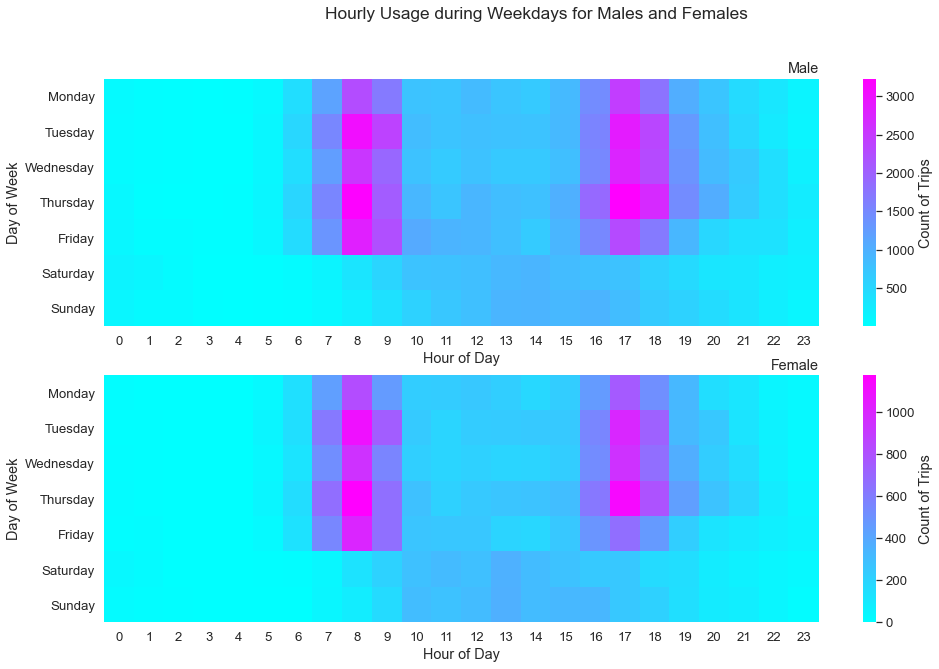

In [39]:
#Hourly Usage during Weekdays for Males and Females
plt.figure(figsize=[16,10])
plt.suptitle('Hourly Usage during Weekdays for Males and Females')
plt.subplot(2,1,1)
males = df.query('member_gender == "Male"')
males = select_data(males,'start_weekday',df['start_time'].dt.hour)
sb.heatmap(males, cmap='cool', cbar_kws={'label': 'Count of Trips'})
plt.title('Male', loc='right')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.subplot(2,1,2)
females = df.query('member_gender == "Female"')
females = select_data(females,'start_weekday',df['start_time'].dt.hour)
sb.heatmap(females, cmap='cool', cbar_kws={'label': 'Count of Trips'})
plt.title('Female', loc='right')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()

>Most of Trips are at working days at 8 AM and 5 PM for both males and females

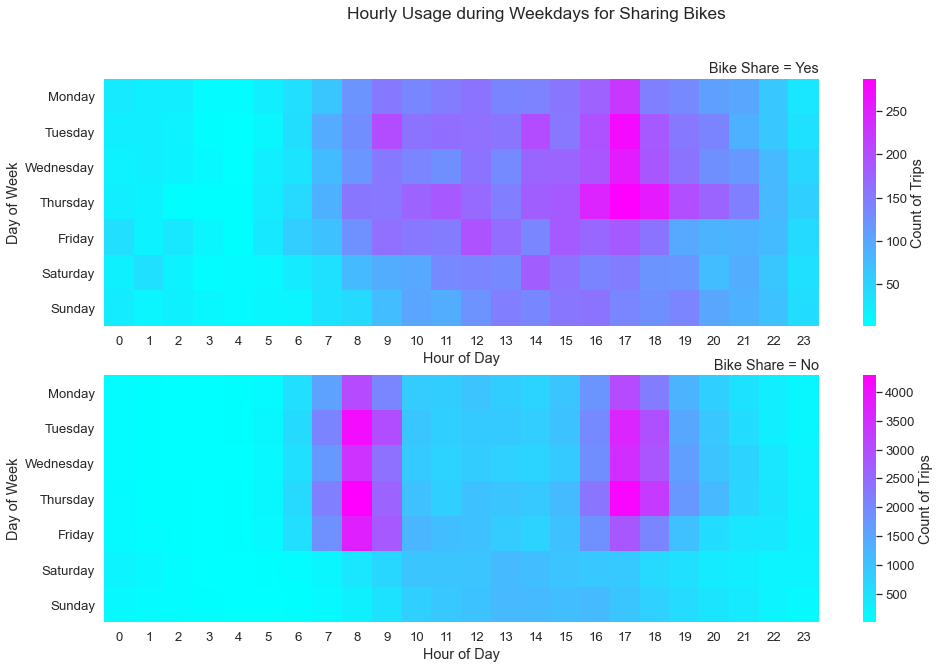

In [40]:
#Hourly Usage during Weekdays for Sharing Bikes
plt.figure(figsize=[16,10])
plt.suptitle('Hourly Usage during Weekdays for Sharing Bikes')
plt.subplot(2,1,1)
y_share = df.query('bike_share_for_all_trip == "Yes"')
y_share = select_data(y_share,'start_weekday',df['start_time'].dt.hour)
sb.heatmap(y_share, cmap='cool', cbar_kws={'label': 'Count of Trips'})
plt.title('Bike Share = Yes', loc='right')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.subplot(2,1,2)
n_share = df.query('bike_share_for_all_trip == "No"')
n_share = select_data(n_share,'start_weekday',df['start_time'].dt.hour)
sb.heatmap(n_share, cmap='cool', cbar_kws={'label': 'Count of Trips'})
plt.title('Bike Share = No', loc='right')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()

>Sharing bikes happens more from (8 AM to 8 PM) during all week while its peak happens in working days at 5 PM (leaving from work)

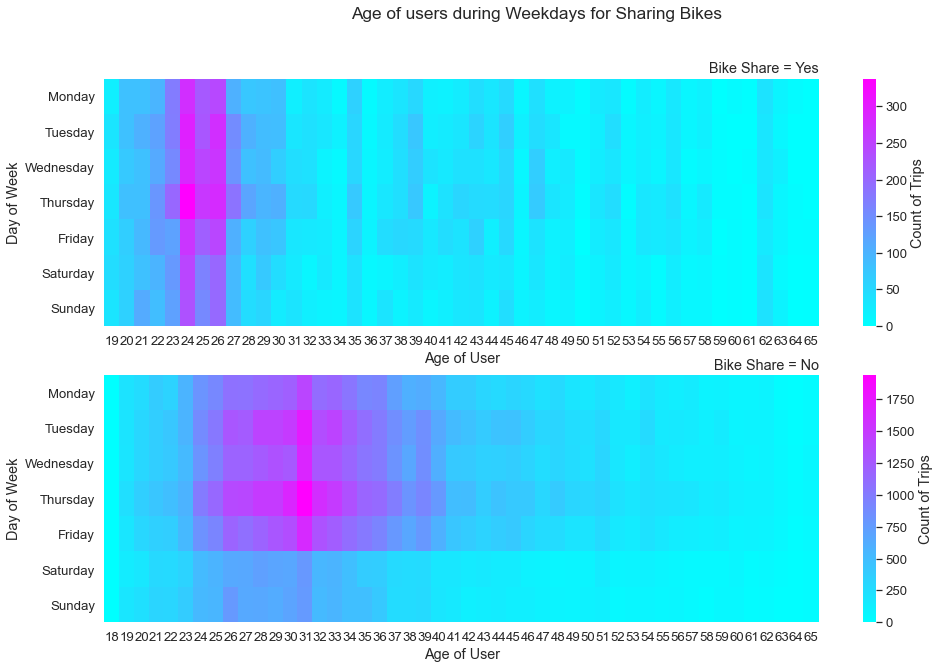

In [41]:
#Age of users during Weekdays for Sharing Bikes
plt.figure(figsize=[16,10])
plt.suptitle('Age of users during Weekdays for Sharing Bikes')
plt.subplot(2,1,1)
y_share = df.query('bike_share_for_all_trip == "Yes"')
y_share = select_data(y_share,'start_weekday','member_age')
sb.heatmap(y_share, cmap='cool', cbar_kws={'label': 'Count of Trips'})
plt.title('Bike Share = Yes', loc='right')
plt.xlabel('Age of User')
plt.ylabel('Day of Week')
plt.subplot(2,1,2)
n_share = df.query('bike_share_for_all_trip == "No"')
n_share = select_data(n_share,'start_weekday','member_age')
sb.heatmap(n_share, cmap='cool', cbar_kws={'label': 'Count of Trips'})
plt.title('Bike Share = No', loc='right')
plt.xlabel('Age of User')
plt.ylabel('Day of Week')
plt.show()

>Users who most share bike at age 24 & 26 years all weekdays, while most trips taken by users of age 31 years at working days

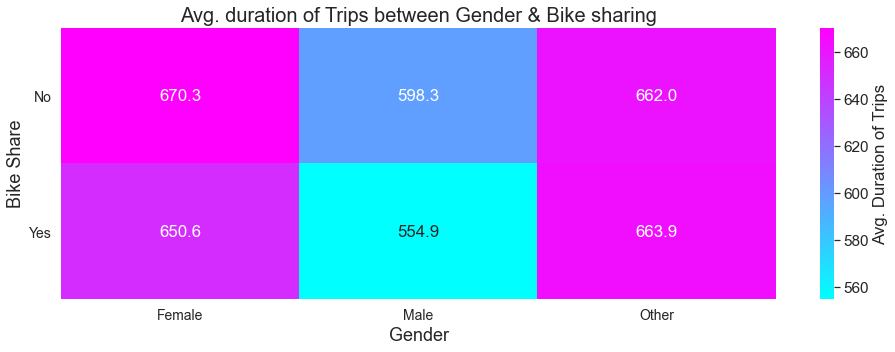

In [42]:
#colleration between bike share and gender of user in term of avg. duration of trips
sb.set(font_scale=1.4)
plt.figure(figsize=[16,5])
gender_share = df.groupby(['member_gender', 'bike_share_for_all_trip']).duration_sec.mean()
gender_share = gender_share.reset_index(name='avg_trip_duration')
gender_share = gender_share.pivot(index = 'bike_share_for_all_trip', columns = 'member_gender', values = 'avg_trip_duration')
sb.heatmap(gender_share, annot = True, fmt = '.1f',cmap = 'cool', cbar_kws={'label': 'Avg. Duration of Trips'})
plt.xlabel("Gender",fontsize=18)
plt.xticks(fontsize=14)
plt.ylabel('Bike Share',fontsize=18)
plt.yticks(rotation = 0, fontsize=14)
plt.title('Avg. duration of Trips between Gender & Bike sharing', fontsize=20)
plt.show()

>The average duration of trip when sharing bike is smaller than not sharing the bike in both males and females

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Most of Trips are at working days at 8 AM and 5 PM for both males and females

Sharing bikes happens more from (8 AM to 8 PM) during all week while its peak happens in working days at 5 PM (leaving from work)

Users who most share bike at age 24 & 26 years all weekdays, while most trips taken by users of age 31 years at working days

The average duration of trip when sharing bike is smaller than not sharing the bike in both males and females


### Were there any interesting or surprising interactions between features?

Users who most share bike at age 24 & 26 years all weekdays

Sharing bikes happens more from (8 AM to 8 PM) during all week while its peak happens in working days at 5 PM (leaving from work)

## References

https://seaborn.pydata.org/generated/seaborn.countplot.html

https://seaborn.pydata.org/generated/seaborn.set_style.html

https://www.carladasilvamatos.com/blog/2019/12/25/lnn5xyodn2kv4i0o2mg9agdw07qgo0

https://matplotlib.org/3.1.1/tutorials/colors/colormaps.html

https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette

https://seaborn.pydata.org/generated/seaborn.countplot.html

https://jakevdp.github.io/PythonDataScienceHandbook/04.06-customizing-legends.html

https://stackoverflow.com/questions/26763344/convert-pandas-column-to-datetime

https://stackoverflow.com/questions/41514173/change-multiple-columns-in-pandas-dataframe-to-datetime/41514347

https://www.dataforeverybody.com/matplotlib-seaborn-pie-charts/